## 1. OBJECTIVE

1. An Education company selling online courses to professionals.

2. the company gets leads in two ways:
 > 1. Professionals landing to company website who either fill up the form with email and phone and watch relevant videos.
 > 2. Through referrals.

3. The company receives lots of leads but the lead conversion rate is very poor (30%)

4. the objective is to identify the hot leads who are like likely to be converted, so the lead conversion rate gets better by building a classification model (logistic regression model) and assign a lead score

5. Higher the lead score, higher the chances of it being a hot lead

6. the target lead score conversion rate must be around 80%




## 2. IMPORTING LIBRARIES

In [1]:
# import all the required libraries

#  basic python libraries
import numpy as np
import pandas as pd

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Model building libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_selection import RFE

## 3. DATA SOURCING

In [2]:
# create a dataframe called leads
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# shape - number of (rows, columns) in a given dataframe
leads.shape

(9240, 37)

In [4]:
# meta information about the data frame
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## 4. DATA CLEANING

#### A. Fixing Columns:

 > 1. there are no missing column names in the given dataset
 > 2. on high level all the columns looks important for analysis
 > 3. the given column names are self explanatory and there is no need to be renamed
 > 4. there are no columns that can be split to have more unique multiple columns
 > 5. there are no columns that can be merged to have a unique column

#### B. Fixing Rows:



 > 1. there are no unnecessary header rows and footer rows in the given dataset
 > 2. After going through the dataset manually, there are no summary total or subtotal rows in the given dataset
 > 3. After going through the dataset manually, there is no column descriptor row in the given dataset
 > 4. there are no blank rows in the given dataset

#### C. Missing values

In [5]:
# frequency of null values in each column in a given dataframe
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [6]:
# drop Prospect ID and Lead Number as they are IDs and does not add any value to our analysis
leads.drop('Prospect ID', axis=1, inplace=True)
leads.drop('Lead Number', axis=1, inplace=True)

In [7]:
# value "select" doesn't represent any useful information, it is as good as null
# converting all Select values to null values
leads_copy = leads.copy()
# looping through each column and setting NaN values for missing values
for i in leads_copy.columns.values.tolist():
    # replacing with np.NaN
    leads_copy.loc[leads_copy[i].isin(['Select']), i] = np.NaN

In [8]:
# frequency of null values in each column in a given dataframe
leads_copy.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

 > After converting "select" values, we see the count has changed for <strong>[ "Specialization", "How did you hear about X Education", "Lead Profile", "City"]</strong>

Null Values Percentage in Each Column 

 How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Get updates on DM Conten

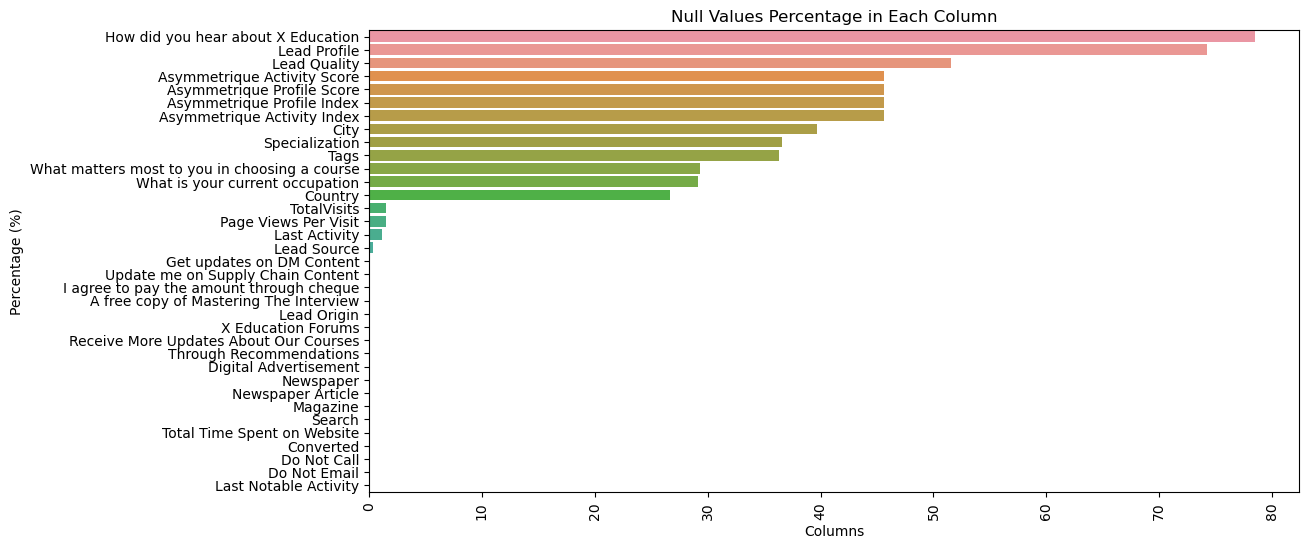

In [9]:
# Calculate null percentage for each column
null_percentage = (leads_copy.isnull().sum() * 100 / len(leads_copy)).round(2).sort_values(ascending=False)
print('Null Values Percentage in Each Column \n\n', null_percentage)
# Create a bar chart using Matplotlib
plt.figure(figsize=(12, 6))
sns.barplot(x=null_percentage.values, y=null_percentage.index)
plt.title('Null Values Percentage in Each Column')
plt.xticks(rotation=90)
plt.ylabel('Percentage (%)')
plt.xlabel('Columns')
plt.show()

In [10]:
# dropping columns whose missing values >30%
leads.drop('How did you hear about X Education', axis=1, inplace=True)
leads.drop('Lead Profile', axis=1, inplace=True)
leads.drop('Lead Quality', axis=1, inplace=True)
leads.drop('Asymmetrique Profile Score', axis=1, inplace=True)
leads.drop('Asymmetrique Activity Score', axis=1, inplace=True)
leads.drop('Asymmetrique Activity Index', axis=1, inplace=True)
leads.drop('Asymmetrique Profile Index', axis=1, inplace=True) 
leads.drop('City', axis=1, inplace=True)
leads.drop('What matters most to you in choosing a course', axis=1, inplace=True)
leads.drop('Tags', axis=1, inplace=True) 
leads.drop('Country', axis=1, inplace=True)
leads.drop('Specialization', axis=1, inplace=True)

Null Values Percentage in Each Column 

 What is your current occupation             29.11
TotalVisits                                  1.48
Page Views Per Visit                         1.48
Last Activity                                1.11
Lead Source                                  0.39
Lead Origin                                  0.00
Newspaper                                    0.00
A free copy of Mastering The Interview       0.00
I agree to pay the amount through cheque     0.00
Get updates on DM Content                    0.00
Update me on Supply Chain Content            0.00
Receive More Updates About Our Courses       0.00
Through Recommendations                      0.00
Digital Advertisement                        0.00
Magazine                                     0.00
X Education Forums                           0.00
Newspaper Article                            0.00
Search                                       0.00
Total Time Spent on Website                  0.00
Converted

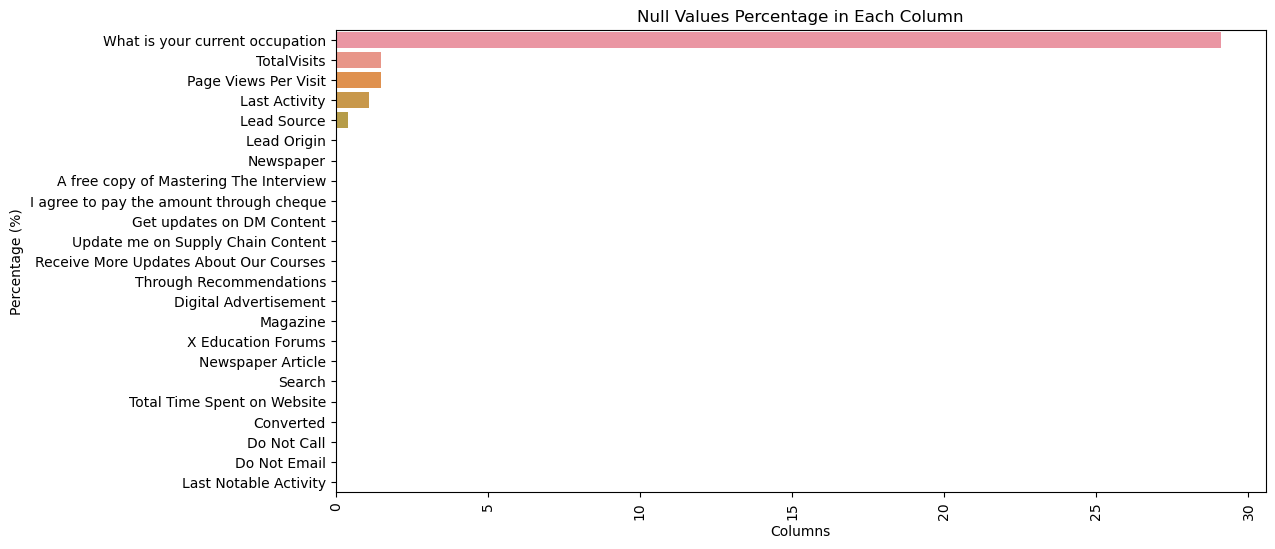

In [11]:
# Calculate null percentage for each column
null_percentage = (leads.isnull().sum() * 100 / len(leads)).round(2).sort_values(ascending=False)
print('Null Values Percentage in Each Column \n\n', null_percentage)
# Create a bar chart using Matplotlib
plt.figure(figsize=(12, 6))
sns.barplot(x=null_percentage.values, y=null_percentage.index)
plt.title('Null Values Percentage in Each Column')
plt.xticks(rotation=90)
plt.ylabel('Percentage (%)')
plt.xlabel('Columns')
plt.show()

## 5. DATA QUALITY CHECK:

In [12]:
# counting values for each column

for col in leads.columns:
    print("*" * 50 + "\n")
    print("column: ", col + "\n")
    print(leads[col].value_counts() * 100 / len(leads))
    print("\n")


**************************************************

column:  Lead Origin

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64


**************************************************

column:  Lead Source

Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM     

> colums <strong>["Do Not Call", "Search", "Magazine", "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement", "Through Recommendations", "Receive More Updates About Our Courses", "Update me on Supply Chain Content", "Get updates on DM Content", "I agree to pay the amount through cheque"]</strong> have zero variance and will not have any impact on our model, hence we can drop these columns

In [13]:
leads.drop(["Do Not Call", "Search", "Magazine", "Newspaper Article", "X Education Forums", "Newspaper",
            "Digital Advertisement", "Through Recommendations", "Receive More Updates About Our Courses",
            "Update me on Supply Chain Content", "Get updates on DM Content",
            "I agree to pay the amount through cheque"], axis=1, inplace = True)

Null Values Percentage in Each Column 

 What is your current occupation           29.11
TotalVisits                                1.48
Page Views Per Visit                       1.48
Last Activity                              1.11
Lead Source                                0.39
Lead Origin                                0.00
Do Not Email                               0.00
Converted                                  0.00
Total Time Spent on Website                0.00
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64


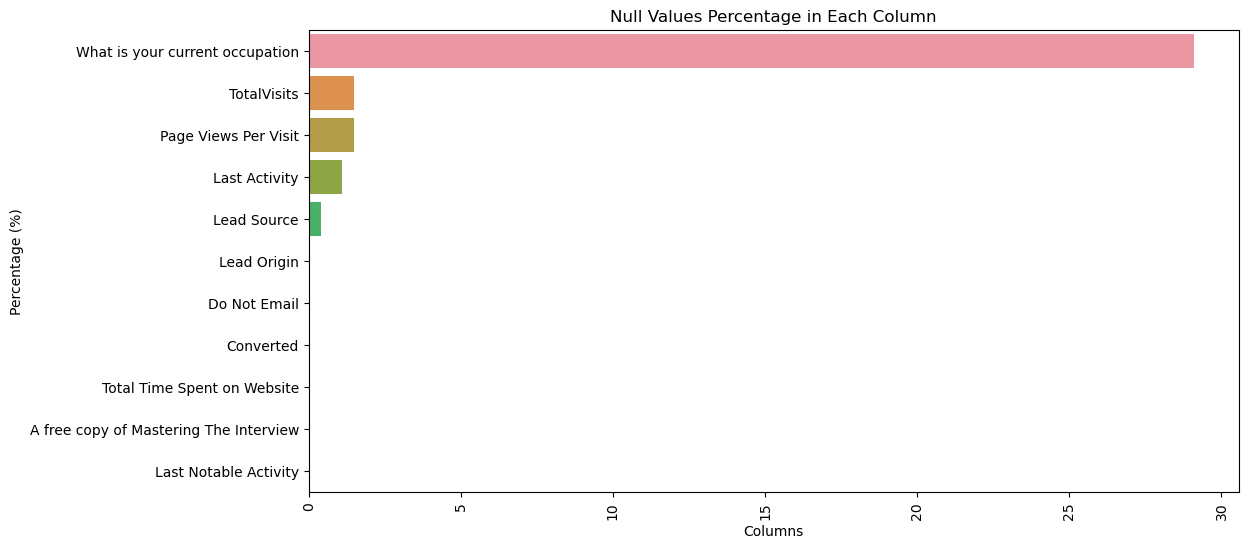

In [14]:
# Calculate null percentage for each column
null_percentage = (leads.isnull().sum() * 100 / len(leads)).round(2).sort_values(ascending=False)
print('Null Values Percentage in Each Column \n\n', null_percentage)
# Create a bar chart using Matplotlib
plt.figure(figsize=(12, 6))
sns.barplot(x=null_percentage.values, y=null_percentage.index)
plt.title('Null Values Percentage in Each Column')
plt.xticks(rotation=90)
plt.ylabel('Percentage (%)')
plt.xlabel('Columns')
plt.show()

## 6. DEALING WITH OUTLIERS:

In [15]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9137 non-null   object 
 8   What is your current occupation         6550 non-null   object 
 9   A free copy of Mastering The Interview  9240 non-null   object 
 10  Last Notable Activity                   9240 non-null   obje

In [16]:
# there are 3 numerical variables in our dataset
leads[['Page Views Per Visit', 'TotalVisits', 'Total Time Spent on Website']].describe()

,Page Views Per Visit,TotalVisits,Total Time Spent on Website
count,9103.000000,9103.000000,9240.000000
mean,2.362820,3.445238,487.698268
std,2.161418,4.854853,548.021466
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,12.000000
50%,2.000000,3.000000,248.000000
75%,3.000000,5.000000,936.000000
max,55.000000,251.000000,2272.000000


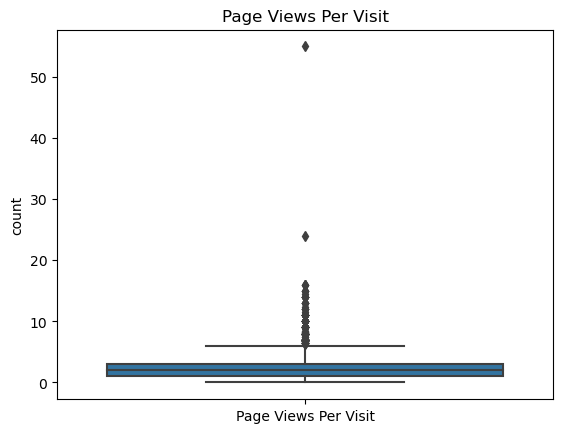

In [17]:
pd.set_option('display.float_format', lambda x: f'{x:.2f}')
plt.ylabel("count")
plt.title("Page Views Per Visit")
sns.boxplot(data=leads[['Page Views Per Visit']])
plt.ticklabel_format(style='plain', axis='y')
plt.show()

> **Observation:** outliers detected for **Page Views Per Visit** but they are well within realistic limits, hence we cannot treat them as outliers

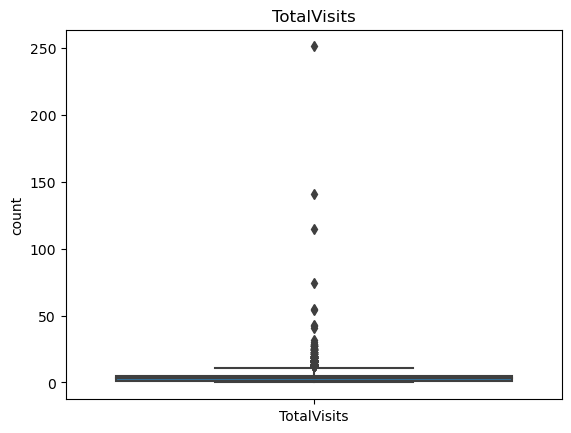

In [18]:
pd.set_option('display.float_format', lambda x: f'{x:.2f}')
plt.ylabel("count")
plt.title("TotalVisits")
sns.boxplot(data=leads[['TotalVisits']])
plt.ticklabel_format(style='plain', axis='y')
plt.show()

> **Observation:** outliers detected for **TotalVisits** but they are well within realistic limits, hence we cannot treat them as outliers

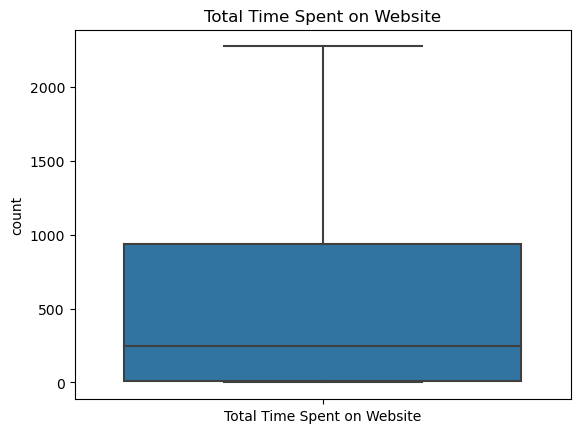

In [19]:
pd.set_option('display.float_format', lambda x: f'{x:.2f}')
plt.ylabel("count")
plt.title("Total Time Spent on Website")
sns.boxplot(data=leads[['Total Time Spent on Website']])
plt.ticklabel_format(style='plain', axis='y')
plt.show()

> **Observation:** No outliers detected in column **Total Time Spent on Website**

## 7. UNIVARIATE ANALYSIS:

Landing Page Submission   0.53
API                       0.39
Lead Add Form             0.08
Lead Import               0.01
Quick Add Form            0.00
Name: Lead Origin, dtype: float64


Text(0.5, 1.0, 'Lead Origin')

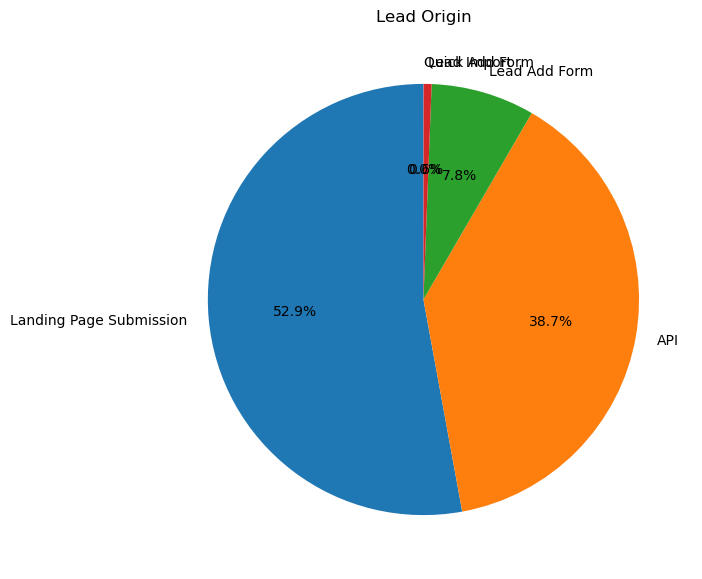

In [20]:
# analyzing Lead Origin variable
target_counts = leads['Lead Origin'].value_counts(normalize=True)
print(target_counts)
plt.figure(figsize=(7, 7))
plt.pie(target_counts, labels=['Landing Page Submission', 'API', 'Lead Add Form', 'Lead Import', 'Quick Add Form' ], autopct='%1.1f%%', startangle=90)
plt.title('Lead Origin')

> majority of the leads have originated from landing page submission and API

No    92.06
Yes    7.94
Name: Do Not Email, dtype: float64


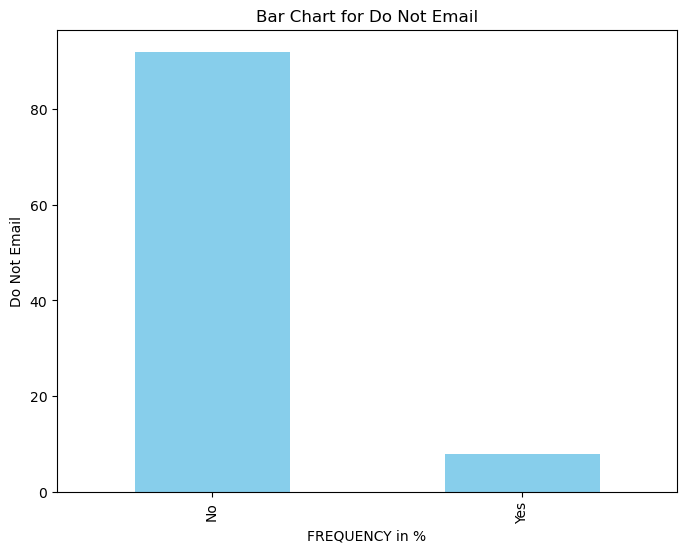

In [21]:
# analayzing Do Not Email
res = leads['Do Not Email'].value_counts(normalize=True)* 100
print(res)
plt.figure(figsize=(8, 6))
res.plot(kind='bar', color='skyblue') 
plt.ylabel('Do Not Email')
plt.xlabel('FREQUENCY in %')
plt.title("Bar Chart for Do Not Email")
plt.show()

> 92% of the leads have opted for No to "Do not Email"

Email Opened                   37.62
SMS Sent                       30.04
Olark Chat Conversation        10.65
Page Visited on Website         7.00
Converted to Lead               4.68
Email Bounced                   3.57
Email Link Clicked              2.92
Form Submitted on Website       1.27
Unreachable                     1.02
Unsubscribed                    0.67
Had a Phone Conversation        0.33
Approached upfront              0.10
View in browser link Clicked    0.07
Email Received                  0.02
Email Marked Spam               0.02
Visited Booth in Tradeshow      0.01
Resubscribed to emails          0.01
Name: Last Activity, dtype: float64


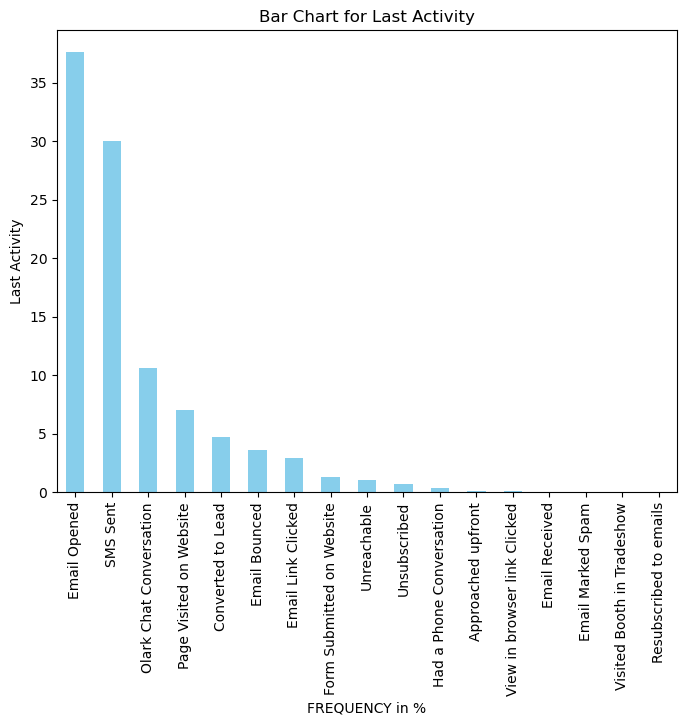

In [22]:
# analyzing Last Activity

res = leads['Last Activity'].value_counts(normalize=True)* 100
print(res)
plt.figure(figsize=(8, 6))
res.plot(kind='bar', color='skyblue') 
plt.ylabel('Last Activity')
plt.xlabel('FREQUENCY in %')
plt.title("Bar Chart for Last Activity")
plt.show()


> Email opened (37.62%) and SMS sent (30%) contribute to majority of 'Last Activity' by the leads

## 8. BIVARIATE ANALYSIS:

A. CATEGORICAL VARIABLES vs TARGET VARIABLE

In [23]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.00,0,0.00,Page Visited on Website,Unemployed,No,Modified
1,API,Organic Search,No,0,5.00,674,2.50,Email Opened,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.00,1532,2.00,Email Opened,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.00,305,1.00,Unreachable,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.00,1428,1.00,Converted to Lead,Unemployed,No,Modified


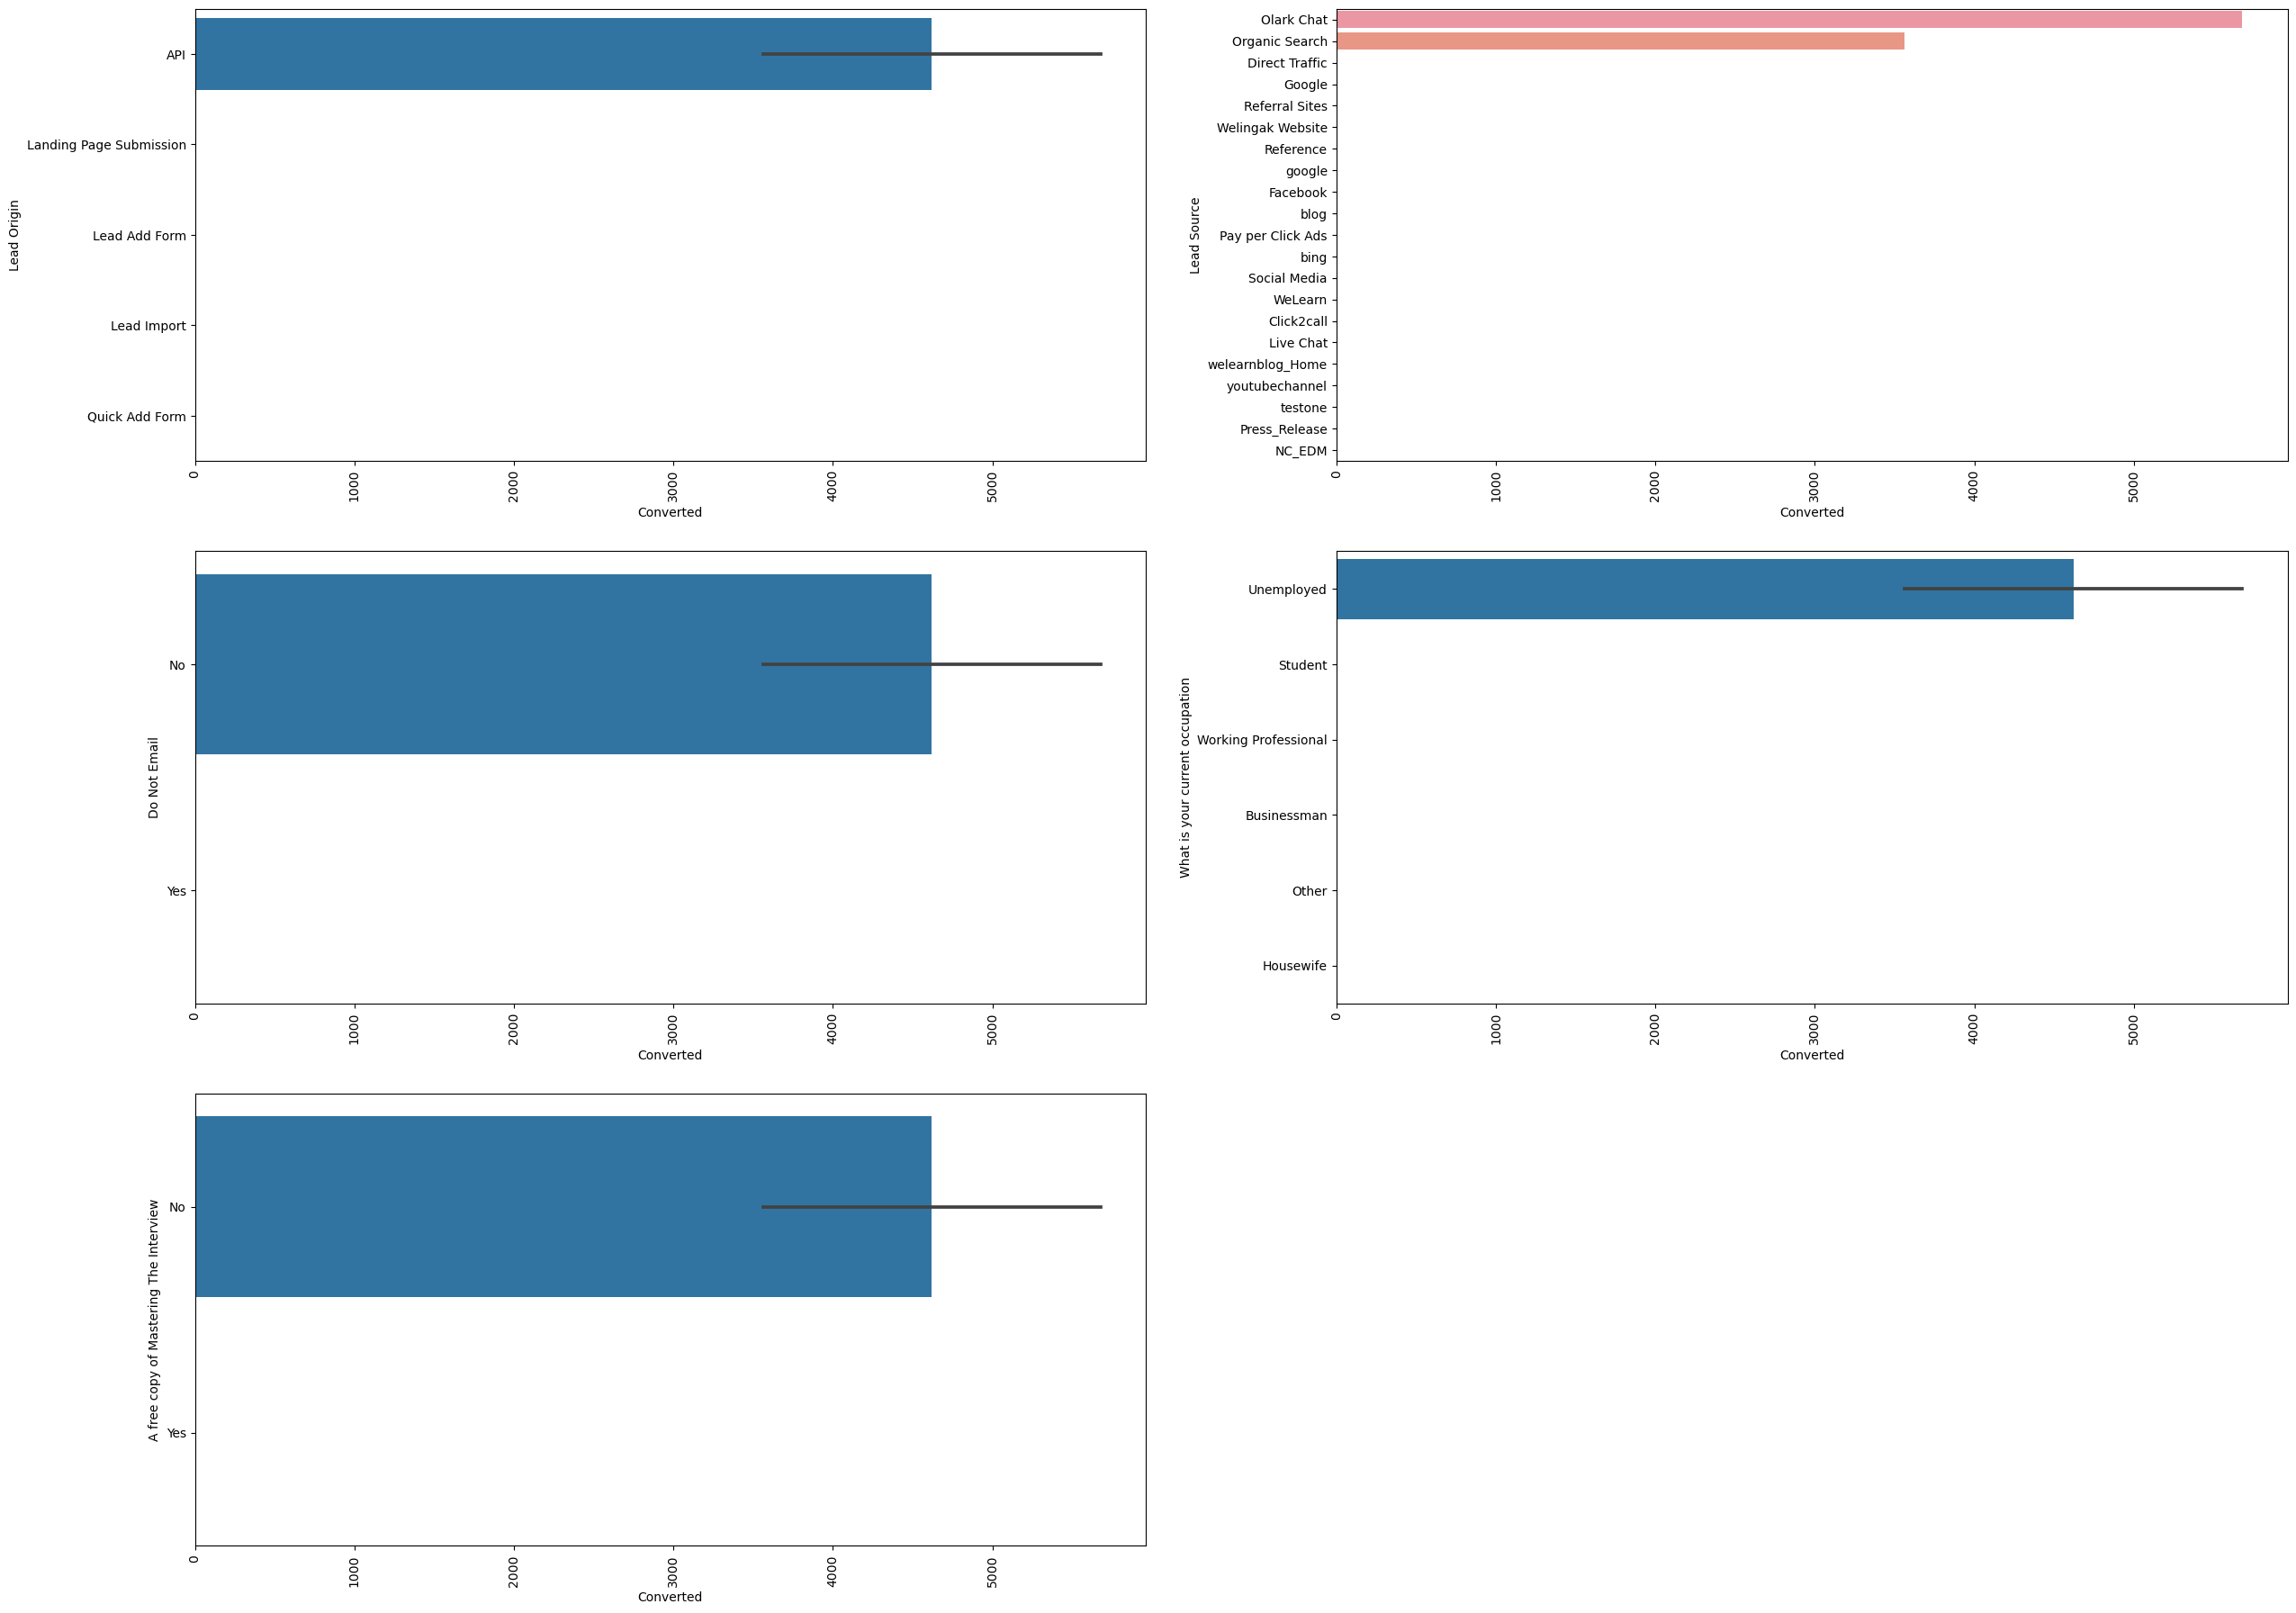

In [24]:
plt.figure(figsize=(30, 30))

plt.subplot(4,2,1)
sns.barplot( y = leads['Lead Origin'], x = leads['Converted'].value_counts(), data = leads)
plt.xticks(rotation=90)


plt.subplot(4,2,2)
sns.barplot(y = leads['Lead Source'], x = leads['Converted'].value_counts(), data = leads)
plt.xticks(rotation=90)


plt.subplot(4,2,3)
sns.barplot(y = leads['Do Not Email'], x = leads['Converted'].value_counts(), data = leads)
plt.xticks(rotation=90)

plt.subplot(4,2,4)
sns.barplot(y = leads['What is your current occupation'], x = leads['Converted'].value_counts(), data = leads)
plt.xticks(rotation=90)


plt.subplot(4,2,5)
sns.barplot(y = leads['A free copy of Mastering The Interview'], x = leads['Converted'].value_counts(), data = leads)
plt.xticks(rotation=90)



plt.show()


> 1. If the lead is originated from API source then they are most likely to be converted
> 2. If the lead is sourced from Olark chat or Organic Search then they are most likely to be converted
> 3. if the lead didn't opt for No to Email, they are most likely to be converted
> 4. if the lead is unemployed, then they are more likely to be converted
> 5. if the lead didnt opt for A free copy of Mastering The Interview, they are most likely to be converted

## 9. EDA OBSERVATIONS:

> <strong> Univariate Analysis </strong>
> 1. majority of the leads have originated from landing page submission and API
> 2. If 92% of the leads have opted for No to "Do not Email"
> 3. Email opened (37.62%) and SMS sent (30%) contribute to majority of 'Last Activity' by the leads

> <strong> Bivariate Analysis </strong>
> 1. If the lead is originated from API source then they are most likely to be converted
> 2. If the lead is sourced from Olark chat or Organic Search then they are most likely to be converted
> 3. if the lead didn't opt for No to Email, they are most likely to be converted
> 4. if the lead is unemployed, then they are more likely to be converted
> 5. if the lead didnt opt for A free copy of Mastering The Interview, they are most likely to be converted

## 10. BUILDING MODEL (Logisitic Regression):

#### A. Creating dummy variables for categorical variables

In [25]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.00,0,0.00,Page Visited on Website,Unemployed,No,Modified
1,API,Organic Search,No,0,5.00,674,2.50,Email Opened,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.00,1532,2.00,Email Opened,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.00,305,1.00,Unreachable,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.00,1428,1.00,Converted to Lead,Unemployed,No,Modified


In [26]:
#  count of NaN in the data set
leads.isna().sum()

Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [27]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9137 non-null   object 
 8   What is your current occupation         6550 non-null   object 
 9   A free copy of Mastering The Interview  9240 non-null   object 
 10  Last Notable Activity                   9240 non-null   obje

In [28]:
# we have to create dummy variables for columns that are object

# select all categorical columns whose dtype is object and create a new dataframe
leads_categorical=leads.select_dtypes(include=['object'])

In [29]:
leads_categorical.head()

,Lead Origin,Lead Source,Do Not Email,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,Page Visited on Website,Unemployed,No,Modified
1,API,Organic Search,No,Email Opened,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,Email Opened,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,Unreachable,Unemployed,No,Modified
4,Landing Page Submission,Google,No,Converted to Lead,Unemployed,No,Modified


In [30]:
# creating dumming columns by setting drop_first=True
leads_dummies = pd.get_dummies(leads_categorical, drop_first=True)
leads_dummies.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [31]:
#  count of NaN in the dummy variables data set
pd.set_option('display.max_rows', None)
leads_dummies.isna().sum()


Lead Origin_Landing Page Submission                     0
Lead Origin_Lead Add Form                               0
Lead Origin_Lead Import                                 0
Lead Origin_Quick Add Form                              0
Lead Source_Direct Traffic                              0
Lead Source_Facebook                                    0
Lead Source_Google                                      0
Lead Source_Live Chat                                   0
Lead Source_NC_EDM                                      0
Lead Source_Olark Chat                                  0
Lead Source_Organic Search                              0
Lead Source_Pay per Click Ads                           0
Lead Source_Press_Release                               0
Lead Source_Reference                                   0
Lead Source_Referral Sites                              0
Lead Source_Social Media                                0
Lead Source_WeLearn                                     0
Lead Source_We

In [32]:
# drop all categorical columns since we have dummy variables created and we wont be needing these columns
all_categorical_columns = list(leads_categorical.columns)
leads = leads.drop(all_categorical_columns, axis=1, errors='ignore')

In [33]:
# Concatenate dummy variables with the actual dataset
leads = pd.concat([leads_dummies, leads], axis=1)

In [34]:
#  count of NaN in the dummy variables data set
pd.set_option('display.max_rows', None)
leads_dummies.isna().sum()

Lead Origin_Landing Page Submission                     0
Lead Origin_Lead Add Form                               0
Lead Origin_Lead Import                                 0
Lead Origin_Quick Add Form                              0
Lead Source_Direct Traffic                              0
Lead Source_Facebook                                    0
Lead Source_Google                                      0
Lead Source_Live Chat                                   0
Lead Source_NC_EDM                                      0
Lead Source_Olark Chat                                  0
Lead Source_Organic Search                              0
Lead Source_Pay per Click Ads                           0
Lead Source_Press_Release                               0
Lead Source_Reference                                   0
Lead Source_Referral Sites                              0
Lead Source_Social Media                                0
Lead Source_WeLearn                                     0
Lead Source_We

#### B. Split data (7:3) for taining set and test set

In [35]:
# Split the dataframe into train and test sets
np.random.seed(0)
df_train, df_test = train_test_split(leads, train_size=0.7, test_size=0.3, random_state=100)

In [36]:
print("train dataset", df_train.shape)
print("test dataset", df_test.shape)

train dataset (6468, 66)
test dataset (2772, 66)


In [37]:
#  count of NaN in the train data set
pd.set_option('display.max_rows', None)
df_train.isna().sum()

Lead Origin_Landing Page Submission                      0
Lead Origin_Lead Add Form                                0
Lead Origin_Lead Import                                  0
Lead Origin_Quick Add Form                               0
Lead Source_Direct Traffic                               0
Lead Source_Facebook                                     0
Lead Source_Google                                       0
Lead Source_Live Chat                                    0
Lead Source_NC_EDM                                       0
Lead Source_Olark Chat                                   0
Lead Source_Organic Search                               0
Lead Source_Pay per Click Ads                            0
Lead Source_Press_Release                                0
Lead Source_Reference                                    0
Lead Source_Referral Sites                               0
Lead Source_Social Media                                 0
Lead Source_WeLearn                                     

In [38]:
#  count of NaN in the test data set
pd.set_option('display.max_rows', None)
df_test.isna().sum()

Lead Origin_Landing Page Submission                      0
Lead Origin_Lead Add Form                                0
Lead Origin_Lead Import                                  0
Lead Origin_Quick Add Form                               0
Lead Source_Direct Traffic                               0
Lead Source_Facebook                                     0
Lead Source_Google                                       0
Lead Source_Live Chat                                    0
Lead Source_NC_EDM                                       0
Lead Source_Olark Chat                                   0
Lead Source_Organic Search                               0
Lead Source_Pay per Click Ads                            0
Lead Source_Press_Release                                0
Lead Source_Reference                                    0
Lead Source_Referral Sites                               0
Lead Source_Social Media                                 0
Lead Source_WeLearn                                     

> there are 99 records in the train set and 38 records in the test set which have NaN for two columns, totalVisits and Page Views Per Visit, hence it is better to remove these rows as it gives an error while training the model if it encounters NaN values

In [39]:
# drop rows whose values have NA in both train and test data set
df_train = df_train.dropna()
df_test = df_test.dropna()

In [40]:
# train data set, creating X and y variables
y_train = df_train.pop('Converted')
X_train = df_train

In [41]:
# test data set, creating X and y variables
y_test = df_test.pop('Converted')
X_test = df_test

In [42]:
#  count of NaN in the train data set
pd.set_option('display.max_rows', None)
X_train.isna().sum()

Lead Origin_Landing Page Submission                     0
Lead Origin_Lead Add Form                               0
Lead Origin_Lead Import                                 0
Lead Origin_Quick Add Form                              0
Lead Source_Direct Traffic                              0
Lead Source_Facebook                                    0
Lead Source_Google                                      0
Lead Source_Live Chat                                   0
Lead Source_NC_EDM                                      0
Lead Source_Olark Chat                                  0
Lead Source_Organic Search                              0
Lead Source_Pay per Click Ads                           0
Lead Source_Press_Release                               0
Lead Source_Reference                                   0
Lead Source_Referral Sites                              0
Lead Source_Social Media                                0
Lead Source_WeLearn                                     0
Lead Source_We

In [43]:
#  count of NaN in the test data set
pd.set_option('display.max_rows', None)
X_test.isna().sum()

Lead Origin_Landing Page Submission                     0
Lead Origin_Lead Add Form                               0
Lead Origin_Lead Import                                 0
Lead Origin_Quick Add Form                              0
Lead Source_Direct Traffic                              0
Lead Source_Facebook                                    0
Lead Source_Google                                      0
Lead Source_Live Chat                                   0
Lead Source_NC_EDM                                      0
Lead Source_Olark Chat                                  0
Lead Source_Organic Search                              0
Lead Source_Pay per Click Ads                           0
Lead Source_Press_Release                               0
Lead Source_Reference                                   0
Lead Source_Referral Sites                              0
Lead Source_Social Media                                0
Lead Source_WeLearn                                     0
Lead Source_We

In [44]:
# building hte correlation matrix for the train dataset
X_train.corr()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Lead Origin_Landing Page Submission,1.00,-0.29,-0.06,NaN,0.52,-0.05,0.08,-0.02,0.01,-0.53,...,-0.11,0.04,-0.01,0.05,0.01,0.00,NaN,0.27,0.29,0.48
Lead Origin_Lead Add Form,-0.29,1.00,-0.01,NaN,-0.17,-0.01,-0.18,0.07,-0.00,-0.13,...,-0.02,-0.02,-0.00,0.14,-0.00,-0.00,NaN,-0.16,-0.19,-0.27
Lead Origin_Lead Import,-0.06,-0.01,1.00,NaN,-0.03,0.94,-0.04,-0.00,-0.00,-0.03,...,-0.01,-0.01,-0.00,-0.02,-0.00,-0.00,NaN,-0.03,-0.05,-0.06
Lead Origin_Quick Add Form,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lead Source_Direct Traffic,0.52,-0.17,-0.03,NaN,1.00,-0.03,-0.42,-0.01,-0.01,-0.30,...,-0.07,0.06,-0.01,0.02,-0.01,0.00,NaN,0.10,0.14,0.14
Lead Source_Facebook,-0.05,-0.01,0.94,NaN,-0.03,1.00,-0.04,-0.00,-0.00,-0.03,...,-0.01,-0.01,-0.00,-0.02,-0.00,-0.00,NaN,-0.03,-0.04,-0.05
Lead Source_Google,0.08,-0.18,-0.04,NaN,-0.42,-0.04,1.00,-0.01,-0.01,-0.34,...,-0.04,-0.00,-0.01,0.00,0.01,0.00,NaN,0.10,0.22,0.20
Lead Source_Live Chat,-0.02,0.07,-0.00,NaN,-0.01,-0.00,-0.01,1.00,-0.00,-0.01,...,-0.00,-0.00,-0.00,0.03,-0.00,-0.00,NaN,-0.01,-0.02,-0.02
Lead Source_NC_EDM,0.01,-0.00,-0.00,NaN,-0.01,-0.00,-0.01,-0.00,1.00,-0.01,...,-0.00,-0.00,-0.00,-0.01,-0.00,-0.00,NaN,0.01,0.01,-0.00
Lead Source_Olark Chat,-0.53,-0.13,-0.03,NaN,-0.30,-0.03,-0.34,-0.01,-0.01,1.00,...,0.17,-0.05,0.03,-0.11,-0.01,-0.01,NaN,-0.28,-0.37,-0.49


In [45]:
# creating a heatmap for the train data set
plt.figure(figsize = (100, 100))
sns.heatmap(X_train.corr(), annot = True)
plt.show()

In [46]:
# build the logistic regression model for the train data set

# creating an logistic regression instance from logistic regression class
logreg = LogisticRegression()

# fit the model with train data set
logreg.fit(X_train,y_train)

# training and test accuracy
print("\n ************************************************\n")
print("Training Accuracy: ", logreg.score(X_train,y_train))
print("Testing Accuracy: ", logreg.score(X_test,y_test))
# verifying the model with the test dataset
predicted = logreg.predict(X_test)
print("\n ************************************************\n")
print("confusion matrix: \n", confusion_matrix(y_test, predicted))
print("\n ************************************************\n")
print("classification report: \n", classification_report(y_test, predicted))




 ************************************************

Training Accuracy:  0.810488302716282
Testing Accuracy:  0.797366495976591

 ************************************************

confusion matrix: 
 [[1498  167]
 [ 387  682]]

 ************************************************

classification report: 
               precision    recall  f1-score   support

           0       0.79      0.90      0.84      1665
           1       0.80      0.64      0.71      1069

    accuracy                           0.80      2734
   macro avg       0.80      0.77      0.78      2734
weighted avg       0.80      0.80      0.79      2734



/Users/vamshikrishna/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
# calculating sensitivity and specificity
confusion_1 = confusion_matrix(y_test, predicted)
TP = confusion_1[0][0]
TN = confusion_1[1][1]
FP = confusion_1[0][1]
FN = confusion_1[1][0]

# sensitivity
print(TP / float(TP+FN))

# specificity
print(TN / float(TN+FP))

0.7946949602122015
0.8032979976442874


In [50]:
# finding RFE ranks for model 1

rfe = RFE(estimator=logreg)

rfe = rfe.fit(X_train, y_train)


/Users/vamshikrishna/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vamshikrishna/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

In [51]:
# RFE ranks for each selected feature
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', False, 33),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 21),
 ('Lead Source_Live Chat', False, 18),
 ('Lead Source_NC_EDM', True, 1),
 ('Lead Source_Olark Chat', False, 9),
 ('Lead Source_Organic Search', False, 8),
 ('Lead Source_Pay per Click Ads', False, 2),
 ('Lead Source_Press_Release', False, 19),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Referral Sites', False, 7),
 ('Lead Source_Social Media', True, 1),
 ('Lead Source_WeLearn', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 31),
 ('Lead Source_blog', False, 13),
 ('Lead Source_google', False, 3),
 ('Lead Source_testone', False, 34),
 ('Lead Source_welearnblog_Home', False, 14),
 ('Lead Source_youtubechannel', False, 17),
 ('Do Not Email_Yes', True, 1),
 ('

In [52]:
# Using predict_proba to get class probabilities for the test set
proba_predictions = logreg.predict_proba(X_test)

# covert them to lead scores ranging from 0 to 100
Lead_scores_in_2d = np.round(proba_predictions * 100).astype(int)
Lead_scores = Lead_scores_in_2d[:, 1]
print(Lead_scores)

[72 97 61 ... 27 16 97]


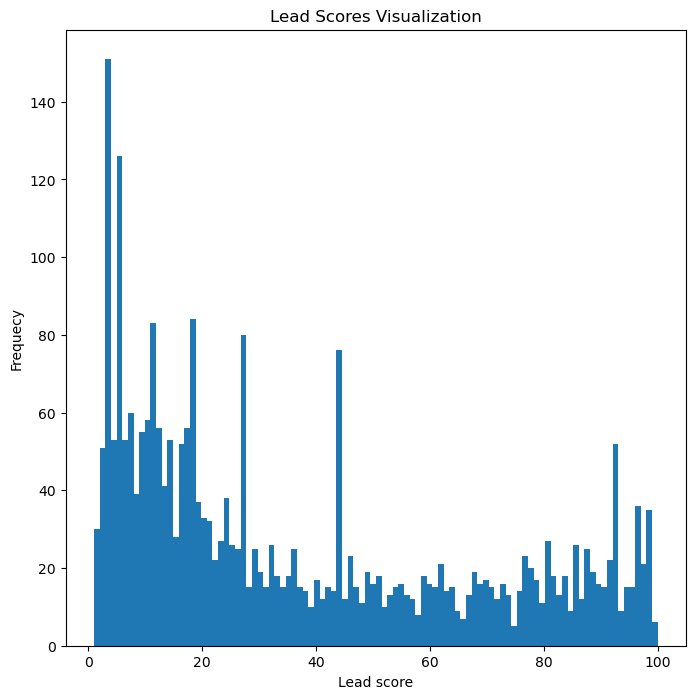

In [53]:
#  visualising the frequency of lead score for the test data

plt.figure(figsize=(8, 8))
plt.hist(Lead_scores, bins=100)
plt.title('Lead Scores Visualization')
plt.xlabel('Lead score')
plt.ylabel('Frequecy')
plt.show()

#### E. RFE - we will reduce the number of independent variables by excluding those which are not relevant in explaining the target variable.

In [54]:
# selecting the top 15 features using RFE

rfe15 = RFE(estimator=logreg, n_features_to_select=15)

rfe15 = rfe15.fit(X_train, y_train)


/Users/vamshikrishna/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vamshikrishna/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

In [55]:
# Selecting only 15 selected columns
X_train_rfe15 = X_train[X_train.columns[rfe15.support_]]
X_test_rfe15 = X_test[X_test.columns[rfe15.support_]]

In [56]:
# RFE ranaks for each selected feature
list(zip(X_train_rfe15.columns, rfe15.support_, rfe15.ranking_))

[('Lead Origin_Lead Add Form', False, 27),
 ('Lead Source_Welingak Website', True, 1),
 ('Do Not Email_Yes', False, 18),
 ('Last Activity_Converted to Lead', False, 50),
 ('Last Activity_Email Bounced', False, 17),
 ('Last Activity_Email Marked Spam', False, 4),
 ('Last Activity_Had a Phone Conversation', False, 38),
 ('Last Activity_Olark Chat Conversation', False, 35),
 ('Last Activity_SMS Sent', False, 3),
 ('What is your current occupation_Housewife', False, 26),
 ('What is your current occupation_Student', False, 25),
 ('What is your current occupation_Unemployed', False, 19),
 ('What is your current occupation_Working Professional', False, 36),
 ('Last Notable Activity_Email Bounced', False, 21),
 ('Last Notable Activity_Unreachable', False, 24)]

In [58]:
# rebuild the model with 15 selected features
logreg2 = LogisticRegression()

logreg2.fit(X_train_rfe15,y_train)
print("\n ************************************************\n")
print("Training Accuracy: ", logreg2.score(X_train_rfe15,y_train))
print("Testing Accuracy: ", logreg2.score(X_test_rfe15,y_test))

predicted = logreg2.predict(X_test_rfe15)
print("\n ************************************************\n")

print("confusion matrix: \n", confusion_matrix(y_test, predicted))
print("\n ************************************************\n")
print("classification report: \n", classification_report(y_test, predicted))



 ************************************************

Training Accuracy:  0.7644842204427696
Testing Accuracy:  0.75932699341624

 ************************************************

confusion matrix: 
 [[1479  186]
 [ 472  597]]

 ************************************************

classification report: 
               precision    recall  f1-score   support

           0       0.76      0.89      0.82      1665
           1       0.76      0.56      0.64      1069

    accuracy                           0.76      2734
   macro avg       0.76      0.72      0.73      2734
weighted avg       0.76      0.76      0.75      2734



In [60]:
# calculating sensitivity and specificity
confusion_1 = confusion_matrix(y_test, predicted)
TP = confusion_1[0][0]
TN = confusion_1[1][1]
FP = confusion_1[0][1]
FN = confusion_1[1][0]

# sensitivity
print(TP / float(TP+FN))

# specificity
print(TN / float(TN+FP))

0.7580727831881087
0.7624521072796935


<strong>Conclusion:</strong>
> 1. the first model has better accuracy with accuracy of 81 % for train data and 79.73 % for test data when compared to second model with accuracy of 76.44 % for train data and 75.93 % for test data
> 2. the first model has less False Positives (FP) 387 when compared to the second model which has False Positives (FP) of 472
> 3. the first model and second model has almost very similar False Negatives (FN)
